<a href="https://colab.research.google.com/github/noelmt7/LAB-3/blob/main/23485338_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('/content/Market_Basket_Optimisation.csv')
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(7500, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [5]:
df.isna().sum()
df = df.fillna(0)

In [6]:
df.drop(columns = ['olive oil'])

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,chicken,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,escalope,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach']

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in categorical_columns:
    # Convert all values to strings
    df[column] = df[column].astype(str)

    # Fit and transform the LabelEncoder
    df[column] = le.fit_transform(df[column])

# Now your categorical columns are encoded as integers
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,29,83,45,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
1,43,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
2,2,52,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
3,98,86,46,15,57,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
4,89,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,30,78,54,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
7496,29,61,45,51,69,53,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
7497,39,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
7498,58,67,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   int64  
 1   almonds            7500 non-null   int64  
 2   avocado            7500 non-null   int64  
 3   vegetables mix     7500 non-null   int64  
 4   green grapes       7500 non-null   int64  
 5   whole weat flour   7500 non-null   int64  
 6   yams               7500 non-null   int64  
 7   cottage cheese     7500 non-null   int64  
 8   energy drink       7500 non-null   int64  
 9   tomato juice       7500 non-null   int64  
 10  low fat yogurt     7500 non-null   int64  
 11  green tea          7500 non-null   int64  
 12  honey              7500 non-null   int64  
 13  salad              7500 non-null   int64  
 14  mineral water      7500 non-null   int64  
 15  salmon             7500 non-null   int64  
 16  antioxydant juice  7500 

<ipython-input-23-9ce57bd83c74>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('inferno')


Text(0.5, 1.0, 'Frequency of Food Items')

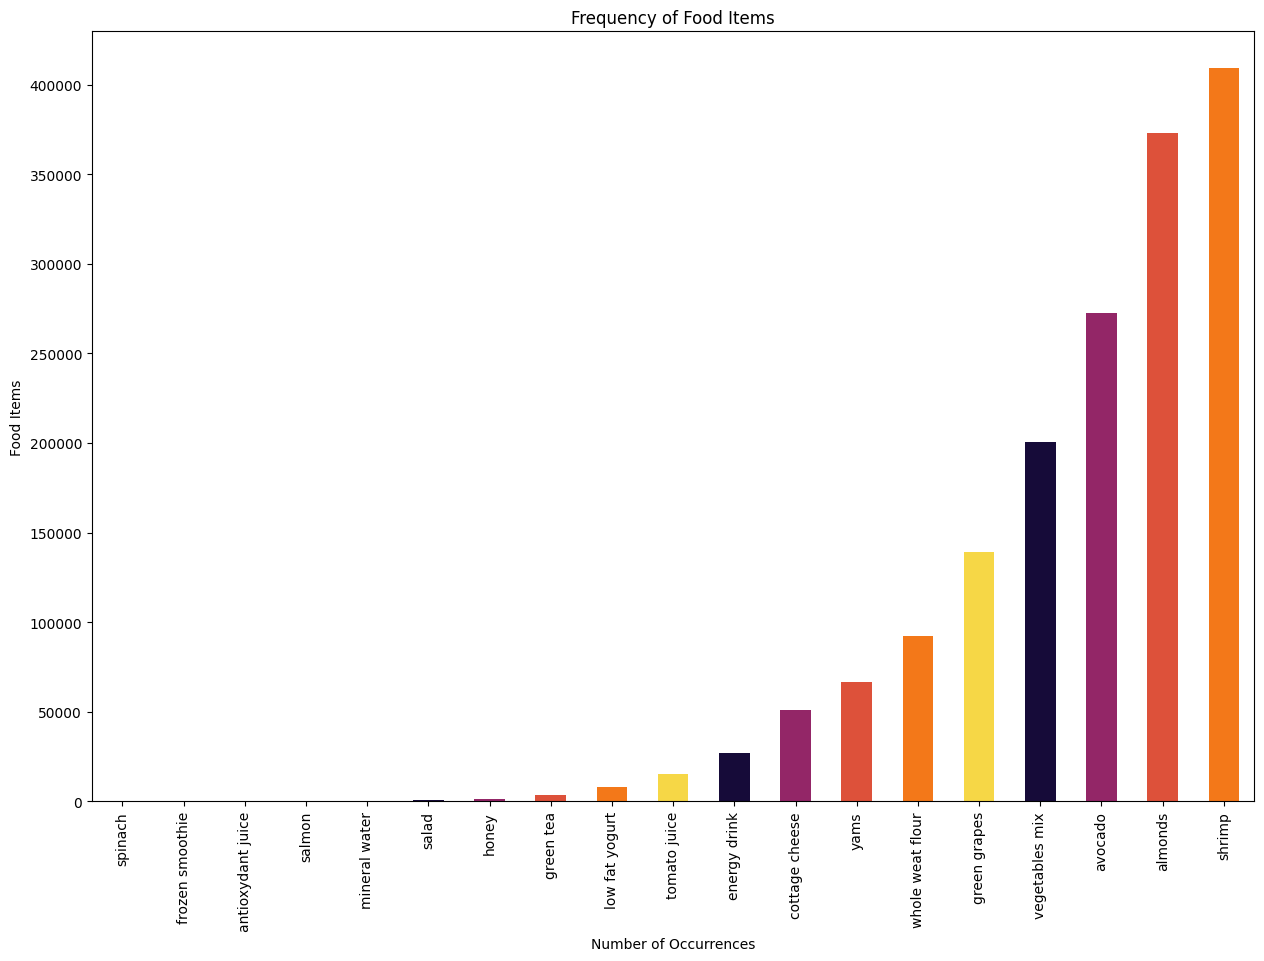

In [23]:
from matplotlib import cm
plt.figure(figsize=(15, 10))
colormap = cm.get_cmap('inferno')

colors = [colormap(0.1), colormap(0.4), colormap(0.6), colormap(0.7), colormap(0.9)]
df.drop('olive oil', axis=1).sum().sort_values().plot(kind='bar', color = colors)
plt.xlabel('Number of Occurrences')
plt.ylabel('Food Items')
plt.title('Frequency of Food Items')

In [33]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


# Convert the data to a binary matrix (0s and 1s) indicating whether each item was bought
basket_sets = df.applymap(lambda x: 1 if x > 0 else 0)

# Find frequent itemsets using Apriori
frequent_itemsets = apriori(basket_sets, min_support=0.06, use_colnames=True)

# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort rules by lift
association_rules_df = association_rules_df.sort_values(by=['lift'], ascending=False)

# Print the top association rules
association_rules_df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4081,"(cottage cheese, shrimp, yams)","(energy drink, vegetables mix)",0.182133,0.087067,0.087067,0.478038,5.490483,0.071209,1.749042,1.000000
16415,"(green grapes, shrimp, vegetables mix, cottage...","(energy drink, almonds, avocado)",0.182133,0.087067,0.087067,0.478038,5.490483,0.071209,1.749042,1.000000
17866,"(green grapes, almonds, shrimp, vegetables mix...",(energy drink),0.182133,0.087067,0.087067,0.478038,5.490483,0.071209,1.749042,1.000000
9211,"(shrimp, vegetables mix, cottage cheese, yams,...",(energy drink),0.182133,0.087067,0.087067,0.478038,5.490483,0.071209,1.749042,1.000000
12214,"(energy drink, almonds, avocado, vegetables mix)","(cottage cheese, shrimp, yams)",0.087067,0.182133,0.087067,1.000000,5.490483,0.071209,inf,0.895867
...,...,...,...,...,...,...,...,...,...,...
894,"(green grapes, avocado)","(cottage cheese, shrimp)",0.337067,0.998400,0.336533,0.998418,1.000018,0.000006,1.011200,0.000027
572,"(almonds, avocado)","(cottage cheese, shrimp)",0.585067,0.998400,0.584133,0.998405,1.000005,0.000003,1.002971,0.000011
117,"(cottage cheese, shrimp)",(avocado),0.998400,0.585067,0.584133,0.585069,1.000005,0.000003,1.000007,0.002967
118,(avocado),"(cottage cheese, shrimp)",0.585067,0.998400,0.584133,0.998405,1.000005,0.000003,1.002971,0.000011


In [32]:
association_rules_df[(association_rules_df['confidence']>0.4) & (association_rules_df['lift']>1)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4081,"(cottage cheese, shrimp, yams)","(energy drink, vegetables mix)",0.182133,0.087067,0.087067,0.478038,5.490483,0.071209,1.749042,1.000000
16415,"(green grapes, shrimp, vegetables mix, cottage...","(energy drink, almonds, avocado)",0.182133,0.087067,0.087067,0.478038,5.490483,0.071209,1.749042,1.000000
17866,"(green grapes, almonds, shrimp, vegetables mix...",(energy drink),0.182133,0.087067,0.087067,0.478038,5.490483,0.071209,1.749042,1.000000
9211,"(shrimp, vegetables mix, cottage cheese, yams,...",(energy drink),0.182133,0.087067,0.087067,0.478038,5.490483,0.071209,1.749042,1.000000
12214,"(energy drink, almonds, avocado, vegetables mix)","(cottage cheese, shrimp, yams)",0.087067,0.182133,0.087067,1.000000,5.490483,0.071209,inf,0.895867
...,...,...,...,...,...,...,...,...,...,...
894,"(green grapes, avocado)","(cottage cheese, shrimp)",0.337067,0.998400,0.336533,0.998418,1.000018,0.000006,1.011200,0.000027
572,"(almonds, avocado)","(cottage cheese, shrimp)",0.585067,0.998400,0.584133,0.998405,1.000005,0.000003,1.002971,0.000011
117,"(cottage cheese, shrimp)",(avocado),0.998400,0.585067,0.584133,0.585069,1.000005,0.000003,1.000007,0.002967
118,(avocado),"(cottage cheese, shrimp)",0.585067,0.998400,0.584133,0.998405,1.000005,0.000003,1.002971,0.000011


In [35]:
worst_choice=association_rules_df.sort_values(by='lift',ascending=True)
print('Least Bought together')
worst_choice[['antecedents','consequents','lift']]

Worst choice to buy items together


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,lift
575,"(cottage cheese, shrimp)","(almonds, avocado)",1.000005
572,"(almonds, avocado)","(cottage cheese, shrimp)",1.000005
118,(avocado),"(cottage cheese, shrimp)",1.000005
117,"(cottage cheese, shrimp)",(avocado),1.000005
894,"(green grapes, avocado)","(cottage cheese, shrimp)",1.000018
...,...,...,...
13370,"(cottage cheese, almonds, shrimp, yams)","(energy drink, green grapes, vegetables mix)",5.490483
12801,(energy drink),"(green grapes, almonds, shrimp, cottage cheese...",5.490483
7114,(energy drink),"(almonds, shrimp, cottage cheese, yams, avocado)",5.490483
13334,"(green grapes, almonds, shrimp, cottage cheese...","(energy drink, vegetables mix)",5.490483


In [36]:
best_choice = association_rules_df.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
best_choice[['antecedents', 'consequents', 'confidence','lift']]

Best choice to buy items together


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,confidence,lift
12214,"(energy drink, almonds, avocado, vegetables mix)","(cottage cheese, shrimp, yams)",1.000000,5.490483
9233,"(energy drink, whole weat flour, vegetables mix)","(cottage cheese, shrimp, yams)",1.000000,5.490483
9200,(energy drink),"(green grapes, shrimp, vegetables mix, cottage...",1.000000,5.490483
14476,"(energy drink, green grapes, whole weat flour,...","(cottage cheese, shrimp, yams)",1.000000,5.490483
13503,"(energy drink, almonds, whole weat flour)","(cottage cheese, yams, shrimp, vegetables mix)",1.000000,5.490483
...,...,...,...,...
5834,(cottage cheese),"(energy drink, green grapes, yams, vegetables ...",0.087078,1.000133
17854,(cottage cheese),"(energy drink, green grapes, almonds, vegetabl...",0.087078,1.000133
3220,(cottage cheese),"(energy drink, almonds, shrimp, yams)",0.087078,1.000133
3190,(cottage cheese),"(energy drink, almonds, shrimp, whole weat flour)",0.087078,1.000133
